Base
O módulo base contém classes base que são usadas para construir os componentes de um algoritmo evolutivo. Por exemplo, base.Fitness é uma classe base para definir a aptidão (fitness) de um indivíduo. É utilizada para armazenar os valores de aptidão e determinar se um indivíduo é melhor que outro com base nos pesos (positivos para maximização, negativos para minimização).

Creator
O módulo creator é uma fábrica que permite criar novas classes dinamicamente. É utilizado para definir tipos personalizados de indivíduos e populações, estendendo as funcionalidades das classes base. Por exemplo, creator.create("FitnessMax", base.Fitness, weights=(1.0,)) cria uma nova classe de aptidão que visa à maximização (peso de 1.0).

Tools
O módulo tools contém funções e operadores genéticos como seleção, mutação, cruzamento e avaliação. É utilizado para implementar as operações genéticas sobre os indivíduos e populações. Por exemplo, tools.initRepeat é uma função que inicializa uma população ou um indivíduo repetindo uma função de atributo um certo número de vezes.

In [1]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy as np
import random

def rastrigin(individual):
    A = 10
    n = len(individual)
    return A*n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]),

# Define o tipo do problema de otimização (minimização)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", rastrigin)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


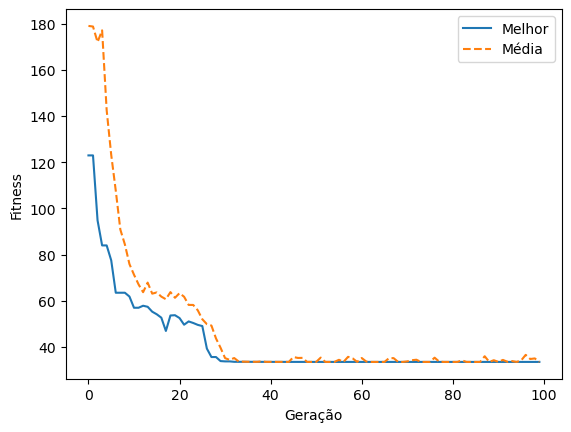

In [2]:
def main():
    pop = toolbox.population(n=20)
    CXPB, MUTPB, NGEN = 0.9, 0.05, 100

    # Avalia a população inicial
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    # Lista para armazenar a média e o melhor fitness por geração
    fitness_mean = []
    fitness_best = []

    for gen in range(NGEN):
        # Seleciona os próximos indivíduos para a próxima geração
        offspring = toolbox.select(pop, len(pop) - 1)
        offspring = list(map(toolbox.clone, offspring))

        # Preserva o melhor indivíduo
        best = tools.selBest(pop, 1)[0]
        offspring.append(best)

        # Aplica crossover e mutação
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Avalia os indivíduos com fitness inválidos
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # A população é inteiramente substituída pelos descendentes
        pop[:] = offspring

        # Coleta as estatísticas da geração
        fits = [ind.fitness.values[0] for ind in pop]
        fitness_mean.append(np.mean(fits))
        fitness_best.append(min(fits))

    # Plotando os resultados
    plt.plot(fitness_best, label="Melhor")
    plt.plot(fitness_mean, label="Média", linestyle="--")
    plt.xlabel("Geração")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

    return pop

if __name__ == "__main__":
    final_pop = main()


In [3]:
import random
from deap import base, creator, tools

# Define uma classe personalizada para o indivíduo
class MeuIndividuo:
    def __init__(self, genes):
        self.genes = genes
        self.fitness = None
    
    def calculate_fitness(self):
        # Implemente a lógica para calcular a aptidão do indivíduo
        pass

# Cria o tipo FitnessMax
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Cria o tipo Individual baseado na classe MeuIndividuo
creator.create("Individual", MeuIndividuo, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Define a função de atributo
toolbox.register("attr_bool", random.randint, 0, 1)

# Define a função de inicialização do indivíduo
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_bool)

# Define a função de inicialização da população
toolbox.register("population", tools.initRepeat, list, toolbox.individual, n=100)


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [4]:
import random
from deap import base, creator, tools

# Define a classe personalizada para o indivíduo
class MeuIndividuo:
    def __init__(self, genes):
        self.genes = genes
    
    def __str__(self):
        return "Genes: " + str(self.genes) + ", Fitness: " + str(self.fitness)

# Define o tipo Fitness e Indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Configuração do toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definição da função de avaliação
def evaluateInd(individual):
    return sum(individual),  # A função de avaliação simplesmente soma os genes
def rastrigin(individual):
    A = 10
    n = len(individual)
    return A*n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]),
toolbox.register("evaluate", rastrigin)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
    population = toolbox.population(n=200)
    CXPB, MUTPB, NGEN = 0.9, 0.05, 5

    # Avalia a população inicial
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Evolução
    for g in range(NGEN):
        print(f"--- Geração {g+1} ---")

        # Seleciona os próximos indivíduos para a próxima geração
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Aplica cruzamento e mutação
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Avalia os indivíduos com fitness inválido
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        population[:] = offspring

        # Imprime a população
        for ind_num, ind in enumerate(population):
            print(f"Indivíduo {ind_num}: {ind}, Fitness: {ind.fitness.values}")

main()


--- Geração 1 ---
Indivíduo 0: [1, 0, 1, 1, 1, 0, 0, 0, 1, 1], Fitness: (6.0,)
Indivíduo 1: [1, 0, 1, 1, 1, 0, 1, 1, 0, 1], Fitness: (7.0,)
Indivíduo 2: [1, 0, 0, 0, 1, 1, 1, 0, 1, 1], Fitness: (6.0,)
Indivíduo 3: [1, 0, 1, 1, 1, 0, 0, 0, 1, 1], Fitness: (6.0,)
Indivíduo 4: [0, 0, 1, 1, 1, 1, 1, 1, 1, 1], Fitness: (8.0,)
Indivíduo 5: [1, 1, 0, 1, 1, 1, 0, 1, 0, 1], Fitness: (7.0,)
Indivíduo 6: [1, 0, 1, 0, 1, 1, 0, 1, 1, 0], Fitness: (6.0,)
Indivíduo 7: [1, 1, 1, 0, 1, 0, 0, 1, 1, 1], Fitness: (7.0,)
Indivíduo 8: [1, 1, 0, 1, 0, 1, 1, 0, 1, 1], Fitness: (7.0,)
Indivíduo 9: [1, 1, 1.684113988999072, 1, 1, 0, 1, 1, 0, 1], Fitness: (23.858748166809946,)
Indivíduo 10: [1, 1, 1, 0, 1, 1, 0, 1, 1, 0], Fitness: (7.0,)
Indivíduo 11: [1, 1, 1, 0, 0, 0, 0, 1, 1, 1], Fitness: (6.0,)
Indivíduo 12: [0, 1, 1, 0, 0, 1, 1, 1, 0, 1], Fitness: (6.0,)
Indivíduo 13: [1, 0, 1, 1, 1, 0, 0, 1, 1, 1], Fitness: (7.0,)
Indivíduo 14: [1, 1, 0, 0, 0, 1, 1, 1, 0, 1], Fitness: (6.0,)
Indivíduo 15: [1, 1, 0, 1, 1, 0

/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
